This notebook is used to compute the auc score of any list.

In [1]:
import torch
import openpyxl
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import torchvision.transforms as transforms
import cv2
import os ,sys
import numpy as np
import torchvision.transforms as transforms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc,f1_score
import scipy
import math

In [2]:
info = openpyxl.load_workbook('D:/dataset_Huo_4/results/resnext101_result_patient.xlsx')
# info = openpyxl.load_workbook('D:/dataset_Huo_1/MSS.xlsx')
sheet = info['method2-2']

In [3]:
true_label = []
#MSIMUT
for i in range(25):
    true_label.append(1)
#MSS
for j in range(74):
    true_label.append(0)

In [4]:
pred1 = []
pred_msi = []
pred_mss = []
for i in range(25):
    pred1.append(sheet["B%d" % (i+1)].value)
    pred_msi.append(sheet["B%d" % (i+1)].value)
for j in range(74):
    pred1.append(sheet["D%d" % (j+1)].value)
    pred_mss.append(sheet["D%d" % (j+1)].value)
# print(pred1)

In [5]:
# pred1 = [0.723935389133627, 0.518151815181518, 0.86283185840708, 0.960629921259842, 0.983606557377049, 0.770083102493075, 0.877256317689531, 0.930966469428008, 0.456459330143541, 0.622623110677718, 0.808165548098434, 0.322498406628426, 0.484722222222222, 0.541427399507793, 0.2657223796034, 0.713090551181102, 0.796457326892109, 0.602898550724638, 0.6375, 0.708502024291498, 0.820833333333333, 0.306849315068493, 0.780114722753346, 0.775510204081633, 0.173469387755102, 0.1632, 0.447916666666667, 0.233278955954323, 0.172185430463576, 0.306487695749441, 0.226796929518493, 0.91015625, 0.120503597122302, 0.717054263565892, 0.638297872340426, 0.609929078014184, 0.186372745490982, 0.380085653104925, 0.540372670807453, 0.616888193901486, 0.376126126126126, 0.899038461538462, 0.629020194465221, 0.232142857142857, 0.0862470862470862, 0.557230454777721, 0.301499605367009, 0.30607476635514, 0.224965706447188, 0.445060018467221, 0.260869565217391, 0.156815440289505, 0.21123595505618, 0.203007518796992, 0.280251141552511, 0.133187772925764, 0.263537906137184, 0.298645759087669, 0.451292246520875, 0.207310966449675, 0.170648464163823, 0.0801457194899818, 0.320300751879699, 0.45037688442211, 0.411283728536386, 0.182412790697674, 0.267326732673267, 0.286632390745501, 0.297597042513863, 0.448, 0.147212543554007, 0.360493827160494, 0.235294117647059, 0.118618618618619, 0.261758691206544, 0.392156862745098, 0.195840554592721, 0.742857142857143, 1, 0.973809523809524, 0.533898305084746, 0.777272727272727, 0.427777777777778, 0.577160493827161, 0.466666666666667, 0.330049261083744, 0.432122370936902, 0.530909090909091, 0.51617873651772, 0.588560885608856, 0.056910569105691, 0.417710944026733, 0.202941176470588, 0.415786202610317, 0.447983014861996, 0.263977635782748, 0.0326377742108079, 0.140957446808511, 0.197530864197531, 0.134281200631912]
auc_score1 = roc_auc_score(true_label,pred1)
print(auc_score1) 
# 0.8175675675675677 - auc_score1 #resnet18
# 0.7474012474012474 - auc_score1
# 0.7422037422037422 - auc_score1
# 0.7785862785862786 - auc_score1 #efficientnet
# 0.8066528066528066 - auc_score1 #dpn131
# 0.734927234927235- auc_score1 #resnext01

0.6983783783783784


In [6]:
# dfmsi = len(pred_msi) - 1
# dfmss = len(pred_mss) - 1
# alpha= 0.95   # 是设定的可信区间, 可以理解为可信度; 数值是百分数,取值范围(0,1)
# ci_msi = scipy.stats.t.interval(alpha, dfmsi, loc=np.mean(pred_msi), scale=scipy.stats.sem(pred_msi)) # ci是置信区间
# ci_mss = scipy.stats.t.interval(alpha, dfmss, loc=np.mean(pred_mss), scale=scipy.stats.sem(pred_mss)) # ci是置信区间
n, min_max, mean, var, skew, kurt = scipy.stats.describe(pred_mss)
std = math.sqrt(var)
ci_msi = scipy.stats.norm.interval(0.95, loc=mean, scale=std)
print('ci_msi:',ci_msi)
# print('ci_mss:',ci_mss)

ci_msi: (-0.2966347994810734, 0.8288042068539374)


In [7]:
pred2 = []
for i in range(25):
    if sheet["B%d" % (i+1)].value < 0.5:
        pred2.append(0)
    if sheet["B%d" % (i+1)].value >= 0.5:
        pred2.append(1)

for j in range(74):
    if sheet["D%d" % (j+1)].value < 0.5:
        pred2.append(0)
    if sheet["D%d" % (j+1)].value >= 0.5:
        pred2.append(1)
# print(pred2)

In [8]:
auc_score2 = roc_auc_score(true_label,pred2)
print(auc_score2)

0.6318918918918919


0.6983783783783784


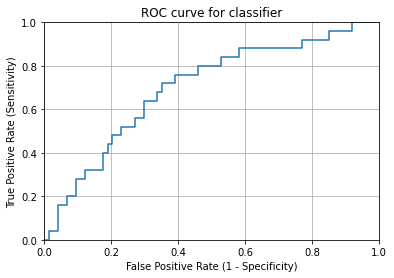

In [9]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(true_label,pred1,pos_label=1)
fpr2,tpr2,thresholds2 = roc_curve(true_label,pred2,pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
# plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print(auc(fpr, tpr))